In [1]:
import params as st
from model import nonlinSys
from feedforward import *

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

tSim = np.linspace(0, 10, 100001)

def updateOde():
    global res, uIn

    def sys(t, x, u, params):
        dx = nonlinSys(t, x, u, params)

        return dx

    x0 = [0, 0, 0, 0]
    params = st.FurutaParams()
   
    uIn = u_validation

    res = solve_ivp(sys,
                    [tSim[0], tSim[-1]],
                    x0,
                    t_eval=tSim,
                    args=(uIn, params))

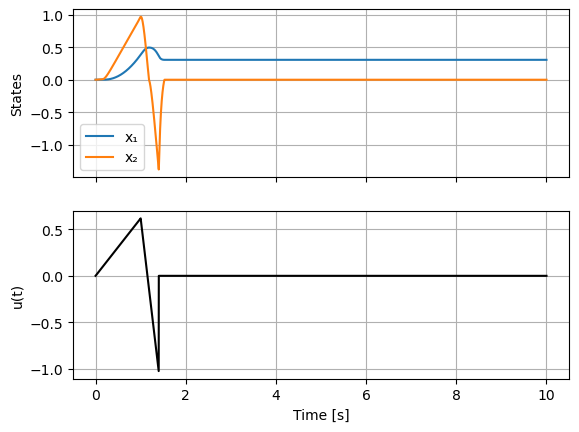

In [2]:
updateOde()

u_vals = np.array([uIn(t) for t in res.t])

fig, ax = plt.subplots(2, 1, sharex=True)

# States
ax[0].plot(res.t, res.y[0], label="x₁")
ax[0].plot(res.t, res.y[1], label="x₂")
ax[0].set_ylabel("States")
ax[0].legend()
ax[0].grid()

# Input
ax[1].plot(res.t, u_vals, color="k")
ax[1].set_ylabel("u(t)")
ax[1].set_xlabel("Time [s]")
ax[1].grid()

plt.show()



In [3]:
from model import calcFriction_b
test = calcFriction_b(1.0, 1.0, 1.0, 1.0)
type(test)

float